## Importing the required Libraries

In [250]:
from google_play_scraper import app
import numpy as np
from google_play_scraper import Sort,reviews
from google_play_scraper import Sort, reviews_all
from tqdm import tqdm
import pandas as pd
import datapane as dp
import altair as alt

In [66]:
dp.Params.load_defaults('datapane.yaml')

AssertionError: 

In [2]:
print (dp.__version__)

0.8.0


In [3]:
result = app('com.tcs.mobile.mtop',
            lang = 'en')

In [4]:
app_packages= ['com.tcs.mobile.mtop']

In [5]:
print(result)

{'title': 'TCS iON mTOP', 'description': 'TCS iON mTOP - Enhance productivity and convenience \r\n\r\nStaying connected to your office has never been this convenient. TCSiON mTOP is an easy-to-use mobile application that allows you to use the TCS iON solutions, perform various tasks and report issues from your mobile devices, no matter where you are.\r\n\r\nTCS iON mTOP  is an application that is accessible on the all versions above 4.0 of Android OS\r\n\r\nTCS iON mTOP comes with few built-in features like \r\n- You can view data specific to your location\r\n\t- System verifies the access rights specified to the user and prevents data being viewed by a user from any other location\r\n- Save login credentials\r\n\t- Allows you to save your credentials so that you need not enter the credentials repeatedly\r\n\r\nTCS iON mTOP enables you to perform activities across various functions from different industry verticals.  Mobile Approvals is a key feature that is enabled across functions by

In [6]:
result, continuation_token = reviews(
    'com.tcs.mobile.mtop',
    lang='en', 
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=3, # defaults to 100
    filter_score_with=5 # defaults to None(means all score)
)

# If you pass `continuation_token` as an argument to the reviews function at this point,
# it will crawl the items after 3 review items.

result, _ = reviews(
    'ccom.tcs.mobile.mtop',
    continuation_token=continuation_token # defaults to None(load from the beginning)
)

In [7]:
print(result)

[]


In [8]:
result = reviews_all(
    'com.tcs.mobile.mtop',
    sleep_milliseconds=0,
    lang='en',
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=5 # defaults to None(means all score)
)

### Printing all the reviews on the page

In [9]:
print(result)

[{'reviewId': 'gp:AOqpTOEoJVju6_br_Ib84pyQDpFKwZl_-D1FVLcKzSuMQDXps_YJSuLJX4f_rIoJggQiyJXUSsiVQpqiPStmGcc', 'userName': 'Teja Srigiri', 'userImage': 'https://lh3.googleusercontent.com/a-/AOh14Ggs-6ootleQNxjDU5-n3Cik9BoLT8UxeOOjH1RK', 'content': 'Software is inefficient because it is taking so long to view the lectures', 'score': 5, 'thumbsUpCount': 6, 'reviewCreatedVersion': '13.0', 'at': datetime.datetime(2020, 6, 12, 14, 2, 26), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOEIU5DtV4Ca3B9dihW8Rx3I-ZPxc7poHplWOGh86551MwZGI8NN_8Dvl3UfPR4BJOgKbH4Oy41kVe5GxxM', 'userName': 'Hari Konidala', 'userImage': 'https://lh3.googleusercontent.com/a-/AOh14Gg8OVttWBYD85Iw-m7pDFMOEKI0EIZJIC2A_ZA5D44', 'content': 'Very good app and great platform to learning', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '13.0', 'at': datetime.datetime(2020, 8, 14, 10, 40, 29), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOFYTCJm-uPlDRDG-JzVrZlamaQkYU6DIr7K2hSwmLf70KHc10

### Sorting app reviews based on there ratings

In [10]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.NEWEST,Sort.RATING,Sort.MOST_RELEVANT,]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.49s/it]


In [11]:
#Total no of reviews extracted
len(app_reviews)

999

# Creating a DataFrame of all the app reviews

In [232]:
app_reviews_df = pd.DataFrame(app_reviews)

In [233]:
app_reviews_df.shape

(999, 12)

In [234]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEBJCtqoUPUUboJyoDPjNeAVd2RggBy4oqzlIL...,Brain Buster Rehan,https://lh3.googleusercontent.com/a-/AOh14Gj7c...,This app sucks,1,0,13.0,2020-10-06 13:52:04,None,NaT,newest,com.tcs.mobile.mtop
1,gp:AOqpTOHXnneOhxHZhHPDTeXoi_vEBxciUmGWbhvlWKp...,chintu never give up,https://lh3.googleusercontent.com/a-/AOh14GjKi...,Its getting too much frustration to me . I'm f...,1,0,13.0,2020-10-05 14:28:16,None,NaT,newest,com.tcs.mobile.mtop
2,gp:AOqpTOGq-65EwXYRXKNEpqVwgfZwmsCacAHmMdSj4mK...,ravi Tiger,https://lh3.googleusercontent.com/a-/AOh14Gjmh...,Bekar app id he disabled ho gya koi solution b...,1,0,13.0,2020-10-04 08:39:22,None,NaT,newest,com.tcs.mobile.mtop
3,gp:AOqpTOFFhMaLqSPHnfWwbNQcGfgRc0Cottd7lytgBF3...,somesh shenoy,https://lh3.googleusercontent.com/a-/AOh14Gg8x...,The shittest app you can use 💩💩💩💩,1,0,13.0,2020-10-03 15:48:15,None,NaT,newest,com.tcs.mobile.mtop
4,gp:AOqpTOEZjZ7KBXz6VCZ5eE3uS0vmdO8thWVrrRMzmEe...,Sankesh Salunke,https://lh3.googleusercontent.com/a-/AOh14GiUT...,Tatti app,1,0,13.0,2020-10-03 10:41:50,None,NaT,newest,com.tcs.mobile.mtop


In [235]:
app_reviews_df.to_csv('app_review.csv', index=None, header=True)

### Reading the created dataframe from library

In [1]:
import pandas as pd
review = pd.read_csv('app_review.csv')

In [2]:
review.drop('reviewId',axis=1,inplace=True)

In [3]:
review.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Brain Buster Rehan,https://lh3.googleusercontent.com/a-/AOh14Gj7c...,This app sucks,1,0,13.0,2020-10-06 13:52:04,NaN,NaN,newest,com.tcs.mobile.mtop
1,chintu never give up,https://lh3.googleusercontent.com/a-/AOh14GjKi...,Its getting too much frustration to me . I'm f...,1,0,13.0,2020-10-05 14:28:16,NaN,NaN,newest,com.tcs.mobile.mtop
2,ravi Tiger,https://lh3.googleusercontent.com/a-/AOh14Gjmh...,Bekar app id he disabled ho gya koi solution b...,1,0,13.0,2020-10-04 08:39:22,NaN,NaN,newest,com.tcs.mobile.mtop
3,somesh shenoy,https://lh3.googleusercontent.com/a-/AOh14Gg8x...,The shittest app you can use 💩💩💩💩,1,0,13.0,2020-10-03 15:48:15,NaN,NaN,newest,com.tcs.mobile.mtop
4,Sankesh Salunke,https://lh3.googleusercontent.com/a-/AOh14GiUT...,Tatti app,1,0,13.0,2020-10-03 10:41:50,NaN,NaN,newest,com.tcs.mobile.mtop


### Deleting all the columns not required for analysis

In [5]:
review.drop('userImage',axis=1,inplace=True)
review.drop('thumbsUpCount',axis=1,inplace=True)
review.drop('reviewCreatedVersion',axis=1,inplace=True)
review.drop('replyContent',axis=1,inplace=True)
review.drop('repliedAt',axis=1,inplace=True)
review.drop('sortOrder',axis=1,inplace=True)
review.drop('appId',axis=1,inplace=True)

In [6]:
review.head()

,userName,content,score,at
0,Brain Buster Rehan,This app sucks,1,2020-10-06 13:52:04
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05 14:28:16
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04 08:39:22
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03 15:48:15
4,Sankesh Salunke,Tatti app,1,2020-10-03 10:41:50


### Spliting the at column to seprate date and time column

In [7]:
review['Date'] = pd.to_datetime(review['at']).dt.date
review['Time'] = pd.to_datetime(review['at']).dt.time
review.head()

,userName,content,score,at,Date,Time
0,Brain Buster Rehan,This app sucks,1,2020-10-06 13:52:04,2020-10-06,13:52:04
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05 14:28:16,2020-10-05,14:28:16
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04 08:39:22,2020-10-04,08:39:22
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03 15:48:15,2020-10-03,15:48:15
4,Sankesh Salunke,Tatti app,1,2020-10-03 10:41:50,2020-10-03,10:41:50


### Dropping the 'at' column 

In [8]:
review.drop('at',axis=1,inplace=True)

In [9]:
review.head()

,userName,content,score,Date,Time
0,Brain Buster Rehan,This app sucks,1,2020-10-06,13:52:04
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05,14:28:16
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04,08:39:22
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03,15:48:15
4,Sankesh Salunke,Tatti app,1,2020-10-03,10:41:50


### Changing the column names to appropriate column names

In [10]:
review.rename(columns={"userName":"User Name", "content":"Comment", "score":"Rating"},inplace=True)
review.head()

,User Name,Comment,Rating,Date,Time
0,Brain Buster Rehan,This app sucks,1,2020-10-06,13:52:04
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05,14:28:16
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04,08:39:22
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03,15:48:15
4,Sankesh Salunke,Tatti app,1,2020-10-03,10:41:50


In [11]:
review.Rating.value_counts()

5    300
1    300
2    174
4    126
3     99
Name: Rating, dtype: int64

In [12]:
review.Comment.value_counts()

Good                                                                                                              45
good                                                                                                              21
Nice                                                                                                              13
Good app                                                                                                          12
Nice app                                                                                                           9
                                                                                                                  ..
Not user friendly at all... Has a lot of issues... There are numerous maintenance issues... Very dissatisfied.     1
World most worst experience in my life....i don't know how to tell about this app                                  1
The apps software is worst as others in the review section say. 

In [138]:
 review.Comment.str.count("UI|slow|Slow|Worst|worst|interface").sum()

127

In [139]:
 review.Comment.str.count("interface|UI").sum()

45

In [132]:
 review.Comment.str.count("Worst|worst").sum()

119

In [133]:
 review.Comment.str.count("interface").sum()

20

In [137]:
 review.Comment.str.count("slow|Slow").sum()

102

In [13]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Name  999 non-null    object
 1   Comment    998 non-null    object
 2   Rating     999 non-null    int64 
 3   Date       999 non-null    object
 4   Time       999 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.1+ KB


### Deleting the NULL value column

In [14]:
review = review[-review.Comment.isnull()]

In [15]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Name  998 non-null    object
 1   Comment    998 non-null    object
 2   Rating     998 non-null    int64 
 3   Date       998 non-null    object
 4   Time       998 non-null    object
dtypes: int64(1), object(4)
memory usage: 46.8+ KB


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range =(2,2),tokenizer = token.tokenize)
text_counts = cv.fit_transform(review["Comment"])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts,review["Rating"],test_size=0.25,random_state=5)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [20]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [21]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

56.40%


In [22]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [23]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

56.40%


In [24]:
#from nltk.tokenize import RegexpTokenizer
#token = RegexpTokenizer(r'[A-Za-z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(review['Comment'])

#from sklearn.model_selection import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, review['Rating'],test_size=0.25, random_state=5)

#Defining the model-> we will use MultinomialNB

#Compiling the model -> We will import precompiled MNB from sklearn library
#from sklearn.naive_bayes import MultinomialNB 

#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Evaulating the model
#form sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

56.40%


In [25]:
cv = CountVectorizer(stop_words='english', ngram_range = (3,3), tokenizer = token.tokenize)
text_counts = cv.fit_transform(review['Comment'])
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, review['Rating'],test_size=0.25, random_state=5)
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

45.20%


In [26]:
#from sklearn.feature_extraction import CountVectorizer
#from nlkt.tokenize import RegexpTokenizer
#token = RegexpTokenixer(r'[A-Za-z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_count = cv.fit_transform(review['Comment'])

#split the dataset in train test 
#form sklearn.model_selection() import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_count, review['Rating'], test_size=0.25, random_state=2)

#Defining and compiling the model -> we will use ComplementNB
from sklearn.naive_bayes import ComplementNB

#Fitting the model
CNB = ComplementNB()
CNB.fit(X_train, Y_train)

#evaluating the model
#from sklearn import metrics
accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

print(str('{:4.2f}'.format(accuracy_score*100))+'%')
# 47.53%

76.40%


In [27]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train.todense(), Y_train)
accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

print('GNB accuracy = ' + str('{:4.2f}'.format(accuracy_score*100))+'%')

GNB accuracy = 76.40%


In [28]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 61.60%


#### Calculating the Subjectivity and Polarity of the User Reviews

In [29]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
review['Subjectivity']=review["Comment"].apply(getSubjectivity)
review['Polarity']=review["Comment"].apply(getPolarity)
review

,User Name,Comment,Rating,Date,Time,Subjectivity,Polarity
0,Brain Buster Rehan,This app sucks,1,2020-10-06,13:52:04,0.300000,-0.300000
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05,14:28:16,0.366667,-0.029167
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04,08:39:22,0.300000,-0.200000
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03,15:48:15,0.000000,0.000000
4,Sankesh Salunke,Tatti app,1,2020-10-03,10:41:50,0.000000,0.000000
...,...,...,...,...,...,...,...
994,A Google user,Awesome,5,2019-03-09,01:49:02,1.000000,1.000000
995,Aditisharad Sharad,Awesome user friendly App with easy navigation,5,2018-10-17,13:04:03,0.777778,0.602778
996,Rahul Singh Rajput,inefficient,5,2018-04-30,15:31:09,0.000000,0.000000
997,Subham Kumar,Its nice,5,2018-09-15,19:15:21,1.000000,0.600000


#### Getting Sentiment Analysis of tweets based on Polarity of User Reviews

In [30]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
review['Analysis'] = review['Polarity'].apply(getAnalysis)
review

,User Name,Comment,Rating,Date,Time,Subjectivity,Polarity,Analysis
0,Brain Buster Rehan,This app sucks,1,2020-10-06,13:52:04,0.300000,-0.300000,Negative
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05,14:28:16,0.366667,-0.029167,Negative
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04,08:39:22,0.300000,-0.200000,Negative
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03,15:48:15,0.000000,0.000000,Neutral
4,Sankesh Salunke,Tatti app,1,2020-10-03,10:41:50,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
994,A Google user,Awesome,5,2019-03-09,01:49:02,1.000000,1.000000,Positive
995,Aditisharad Sharad,Awesome user friendly App with easy navigation,5,2018-10-17,13:04:03,0.777778,0.602778,Positive
996,Rahul Singh Rajput,inefficient,5,2018-04-30,15:31:09,0.000000,0.000000,Neutral
997,Subham Kumar,Its nice,5,2018-09-15,19:15:21,1.000000,0.600000,Positive


In [31]:
review.Polarity.value_counts()

 0.000000    245
 0.700000    118
-1.000000     59
 0.500000     47
 1.000000     38
            ... 
-0.200000      1
-0.029167      1
 0.050000      1
-0.291667      1
-0.071429      1
Name: Polarity, Length: 162, dtype: int64

In [32]:
review.Analysis.value_counts()

Positive    447
Negative    306
Neutral     245
Name: Analysis, dtype: int64

#### Printing all the positive User Reviews 

In [275]:
j=1
sortedDF = review.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        (str(j)+')'+sortedDF['Comment'][i])
        print()
        j = j+1
        return Positive_reviews
print(Positive_reviews)

SyntaxError: 'return' outside function (<ipython-input-275-5c42d201a9e5>, line 8)

#### Printing all the negaative User Reviews 

In [34]:
j=1
sortedDF = review.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Comment'][i])
        print()
        j = j+1

1)This app sucks

2)Its getting too much frustration to me . I'm forgotted my password, when I'm trying to recover it, its asking me many time re-entre captica , re-enter captica Due this im unable to join my class And my attendance also getting lowwww Without attendance I'm not able to go upper standards Please fix this problem ..😠

3)Bekar app id he disabled ho gya koi solution bta do

4)Worst app

5)Worst app ever

6)Poor

7)What a bad UI, it literally loads an mobile site inside the app, which is also not optimized for mobile. Didn't expected this kind of bad user experience from India's Top Software company.

8)Worst app ever please don't download this app🙏🙏🙏

9)It is a bad app... It's ui is very difficult to use/understand ...this is not user friendly app... It has many bugs and glitches... Too bad... 😑

10)Very poor service

11)Its not even opening, worst app

12)Hate it, not even work , If your whole company can't make a native app give me the api i will make for you.

13)Very 

KeyError: 863

In [35]:
import matplotlib.pyplot as plt

In [36]:
# def isNaN(value):
#     return value != value

#### Creating a wordcloud from all the User Reviews

<function matplotlib.pyplot.show(*args, **kw)>

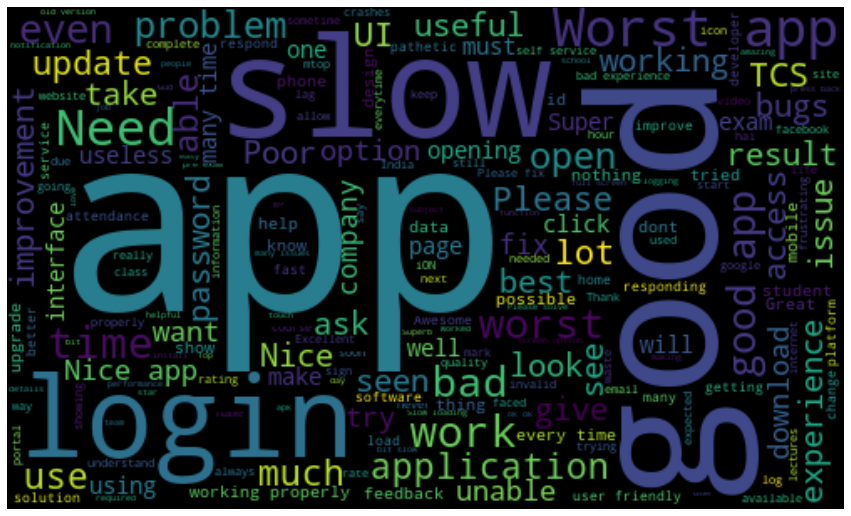

In [229]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
allWords =' '.join([cmts for cmts in review["Comment"]])
wordCloud = WordCloud(width =500,height =300,random_state = 21,max_font_size =150).generate(allWords)
fig=plt.figure(figsize=(15,15),facecolor=None)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show

#### Scatter Plot

KeyError: 863

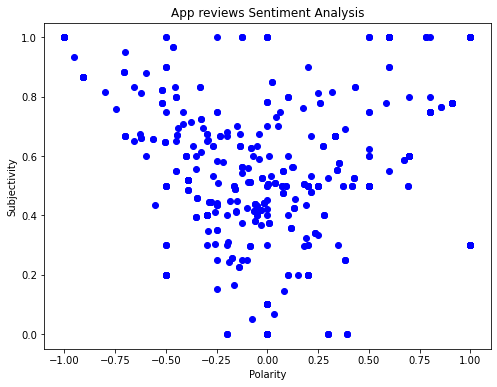

In [38]:
# plt.figure(figsize=(8,6))
# for i in range(0,review.shape[0]):
#     plt.title('App reviews Sentiment Analysis')
#     plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
#     scatter_plot=plt.scatter(review['Polarity'][i],review['Subjectivity'][i],color='Blue')
# return scatter_plot

# plt.show()

In [235]:
import plotly.express as px
# df = px.data.iris()
fig2 = px.scatter(review, x="Polarity", y="Subjectivity", color="Polarity", hover_data=['Analysis'])
fig2.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig2.show()


In [39]:
previews = review[review.Analysis =='Positive']
previews =previews['Comment']

round((previews.shape[0]/review.shape[0])*100 ,1)


44.8

In [40]:
nreviews = review[review.Analysis =='Negative']
nreviews =nreviews['Comment']

round((nreviews.shape[0]/review.shape[0])*100 ,1)

30.7

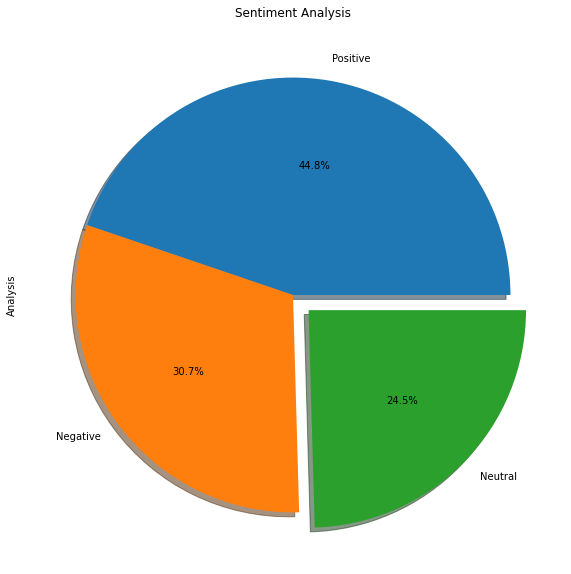

In [41]:
pie_chart = pd.DataFrame({'Sentiment': ['Positive', 'Negative', 'Neutral'],
                   'Analysis': [447, 306, 245]})
pie_chart.set_index('Sentiment', inplace=True)
pie_chart = pie_chart.plot.pie(y='Analysis', title="Sentiment Analysis", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0,figsize=(10,10))

plt.show()

In [259]:
import plotly.graph_objects as go
colors = ['cyangreen', 'cyanblue', 'cyanred']

fig1 = go.Figure(data=[go.Pie(labels=['Positive 😊','Negative 😔','Neutral 😐'],
                             values=[447, 306, 245],pull=[0, 0, 0.1])])
fig1.update_traces(hoverinfo='label', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors),title='Sentiment Analysis of User Feedback Comments')
fig1.update_layout(margin=dict(t=1, b=4, l=1, r=1))
fig1.show()

In [42]:
review['length'] = review['Comment'].apply(len)
review.head()

,User Name,Comment,Rating,Date,Time,Subjectivity,Polarity,Analysis,length
0,Brain Buster Rehan,This app sucks,1,2020-10-06,13:52:04,0.300000,-0.300000,Negative,14
1,chintu never give up,Its getting too much frustration to me . I'm f...,1,2020-10-05,14:28:16,0.366667,-0.029167,Negative,314
2,ravi Tiger,Bekar app id he disabled ho gya koi solution b...,1,2020-10-04,08:39:22,0.300000,-0.200000,Negative,51
3,somesh shenoy,The shittest app you can use 💩💩💩💩,1,2020-10-03,15:48:15,0.000000,0.000000,Neutral,33
4,Sankesh Salunke,Tatti app,1,2020-10-03,10:41:50,0.000000,0.000000,Neutral,9


In [288]:
fig3 = px.bar(review, x="length", y="Analysis", color="Analysis")
fig3.show()

In [291]:
review.length.sum()

56158

In [44]:
review.Rating.value_counts()

1    300
5    299
2    174
4    126
3     99
Name: Rating, dtype: int64

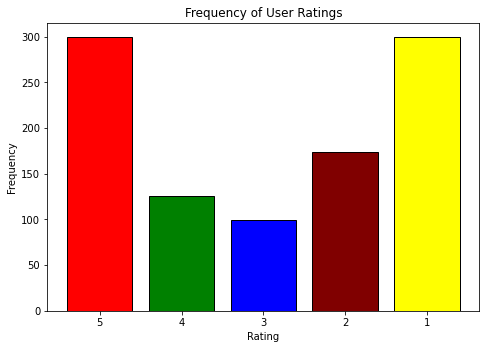

In [86]:
# bar_plot = plt.figure()
# bar_plot = bar_plot.add_axes([0,0,1,1])
# Rating = ['5', '4', '3', '2', '1']
# Frequency = [299, 126, 99, 174, 300]
# plt.title('Frequency of User Ratings')
# plt.xlabel("Rating") 
# plt.ylabel("Frequency")
# bar_plot=plt.bar(Rating,Frequency,color =['Red', 'green', 'blue', 'maroon', 'yellow'],edgecolor='black',width = 0.8)
# plt.show()

In [253]:
import plotly.express as px
data={'Rating':['5★','4★','3★','2★','1★'],'Frequency':[299, 126, 99, 174, 300]}
bar_df = pd.DataFrame(data)
bar_plot = px.bar(bar_df,x='Rating',y='Frequency',hover_data=['Frequency'],
                  color='Rating',height=600,width=1100)
# bar_plot.update_traces(title='User Rating')
bar_plot.show()

In [300]:
nfeedback = review[review['length'] == 494]
nfeedback

,User Name,Comment,Rating,Date,Time,Subjectivity,Polarity,Analysis,length
285,ANMOL DENGANI,worst app ever. i cant fill my pending forms s...,1,2019-07-07,11:02:45,0.425,-0.1,Negative,494


In [301]:
pfeedback = review[review['length'] == 499]
pfeedback

,User Name,Comment,Rating,Date,Time,Subjectivity,Polarity,Analysis,length
476,vaibhavi sharma,Hi I'm a student and and I want to tell my exp...,3,2020-08-19,12:21:20,0.423571,0.133155,Positive,499
525,vaibhavi sharma,Hi I'm a student and and I want to tell my exp...,3,2020-08-19,12:21:20,0.423571,0.133155,Positive,499
540,vaibhavi sharma,Hi I'm a student and and I want to tell my exp...,3,2020-08-19,12:21:20,0.423571,0.133155,Positive,499


In [49]:
# chart = alt.Chart(review).encode(
#     x='Date',
#     y='Rating'
# ).mark_line().interactive()

# r = review.Comment(dp.Table(review), dp.Plot(chart))
# r.publish(name='review_report', open=True)

In [55]:
import datapane as dp

In [308]:
report = dp.Report(
    dp.Markdown("# App User Review Sentiment Analysis"),
    dp.Markdown("##  ➜TCS iON mTOP app reviews"),
    dp.Markdown("### Frequency of Ratings"),
    dp.Plot(bar_plot),
    dp.Markdown("##### ⇨ Maximum user gave either 5★ or 1★ rating to the app."),
    dp.Markdown("# "),
    dp.Markdown("# "),
    dp.Markdown("### Analysis of User Reviews"),
    dp.Plot(fig1),
    dp.Markdown("##### ⇨ Mixed user reviews can be seen from the above pie-chart."),
    dp.Markdown("# "),
    dp.Markdown("# "),
    dp.Markdown("### Correlation of Polarity and Subjectivity of User Comments"),
    dp.Markdown("# "),
    dp.Markdown("# "),
    dp.Plot(fig2),
    dp.Markdown("# "),
    dp.Markdown("# "),
    dp.Markdown("### Length of User Reviews"),
    dp.Plot(fig3),
    dp.Markdown("##### ⇨ Negative user feedbacks were more descriptive."),
    dp.Markdown("#### ⇨ Longest Positive User Feedback "),
    dp.Markdown("#####  -Hi I'm a student and and I want to tell my experience about this app. According to me this app is ok ok. Actually the only thing is that u have to click and click and click to get to the assignment or anything you want to see. It takes sooooooo much of time to get to the next page. It is sooo slow. All I want is it to become a little quick. Right now you all must be using this app in lockdown at home. I have also checked for people's feedback for this. They say there are login issues n all that"),    
    dp.Markdown("#### ⇨ Longest Negative User Feedback "),
    dp.Markdown("#####  - worst app ever. i cant fill my pending forms since this self servive portal came. I also raised tickets since but still not resolved. if they weren't able to do Digitization be properly, they should have not done it at all..This self service portal is nothing but an inconvenience to students because the transition to portal should have come into effect till now. Its been 3 weeks since this website and app was launched still nothing useful in here. I would have given negative stars i could."),
    dp.Markdown("### WordCloud"),
    dp.Plot(fig),
    dp.Markdown("##### ⇨ Around 12.7% users had issues with the user interface of the app."),
    dp.Markdown("### DataSet"),
    dp.Table(review)
)

In [309]:
report.publish(name='App_Review',headline="TCS iON mTop App Reviews Sentiment Analysis")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/utkarsh/reports/App_Review/
